# Basic Imports

In [1]:
from __future__ import print_function, division
import logging
reload(logging)
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s.%(msecs).03d %(name)s %(message)s",
    datefmt='%Y-%m-%dT%H:%M:%S'
)

In [2]:
%matplotlib inline

In [3]:
import pandas
import numpy
from matplotlib import pylab
import seaborn
from scipy.special import erf

# Import Sequencing Data

Selection data needs to be formatted as a "list of dicts" representing each round of selection. This structure is of the form:

````
{ name : # Name of the selection round.
    {
        "parent" : # Name of parent population, if selection was performed, else None
        "selection_level" : # Protease level, if selection was performend, else None
        "Frac_sel_pop" : # Optional, fraction of population collected during sort, else None
        "P_sel" : # Integer counts of # of cells selected in round. Derived from sequence data.
    }
}
````

In [4]:
import protease_experimental_analysis.data as data

In [5]:
src_data = data.model_input["rd3_tryp"]
count_data = data.counts["rd3_tryp"]
src_data_redo = data.model_input["rd3_redo_tryp"]
#The rd3_tryp and rd3_redo_tryp datasets are complete biological replicates of each other

# Generate Model and fit MAP

In [6]:
import protease_experimental_analysis.protease_sequencing_model as protease_sequencing_model
reload(protease_sequencing_model)

<module 'protease_experimental_analysis.protease_sequencing_model' from '/Users/grocklin/Work/nods/nods paper/codecheck/protease_experimental_analysis/protease_experimental_analysis/protease_sequencing_model.pyc'>

In [7]:
src_model = (
    protease_sequencing_model.FractionalSelectionModel(response_fn="NormalSpaceErfResponse",
                                                      min_selection_mass=5e-7,
                                                      min_selection_rate=0.0001,
                                                      outlier_detection_opt_cycles=1,
                                                      sel_k=0.8)
    .build_model(src_data))

src_model_redo = (
    protease_sequencing_model.FractionalSelectionModel(response_fn="NormalSpaceErfResponse",
                                                      min_selection_mass=5e-7,
                                                      min_selection_rate=0.0001,
                                                      outlier_detection_opt_cycles=1,
                                                      sel_k=0.8)
    .build_model(src_data_redo))

2017-05-02T22:19:23.064 protease_experimental_analysis.protease_sequencing_model Unused keys in population_data[0] : set(['name', 'seq_counts', 'num_selected', 'min_fraction'])
2017-05-02T22:19:23.065 protease_experimental_analysis.protease_sequencing_model Unused keys in population_data[1] : set(['name', 'seq_counts', 'num_selected', 'min_fraction'])
2017-05-02T22:19:23.066 protease_experimental_analysis.protease_sequencing_model Unused keys in population_data[2] : set(['name', 'seq_counts', 'num_selected', 'min_fraction'])
2017-05-02T22:19:23.067 protease_experimental_analysis.protease_sequencing_model Unused keys in population_data[3] : set(['name', 'seq_counts', 'num_selected', 'min_fraction'])
2017-05-02T22:19:23.067 protease_experimental_analysis.protease_sequencing_model Unused keys in population_data[4] : set(['name', 'seq_counts', 'num_selected', 'min_fraction'])
2017-05-02T22:19:23.068 protease_experimental_analysis.protease_sequencing_model Unused keys in population_data[5] 

Applied interval-transform to sel_ec50 and added transformed sel_ec50_interval_ to model.


2017-05-02T22:19:35.625 protease_experimental_analysis.protease_sequencing_model Unused keys in population_data[0] : set(['name', 'seq_counts', 'num_selected', 'min_fraction'])
2017-05-02T22:19:35.626 protease_experimental_analysis.protease_sequencing_model Unused keys in population_data[1] : set(['name', 'seq_counts', 'num_selected', 'min_fraction'])
2017-05-02T22:19:35.626 protease_experimental_analysis.protease_sequencing_model Unused keys in population_data[2] : set(['name', 'seq_counts', 'num_selected', 'min_fraction'])
2017-05-02T22:19:35.627 protease_experimental_analysis.protease_sequencing_model Unused keys in population_data[3] : set(['name', 'seq_counts', 'num_selected', 'min_fraction'])
2017-05-02T22:19:35.628 protease_experimental_analysis.protease_sequencing_model Unused keys in population_data[4] : set(['name', 'seq_counts', 'num_selected', 'min_fraction'])
2017-05-02T22:19:35.628 protease_experimental_analysis.protease_sequencing_model Unused keys in population_data[5] 

Applied interval-transform to sel_ec50 and added transformed sel_ec50_interval_ to model.


In [8]:
%%time
default_map = src_model.find_MAP()

2017-05-02T22:19:39.766 protease_experimental_analysis.protease_sequencing_model optimize_params: 12522 members
2017-05-02T22:19:56.733 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 12522 members
2017-05-02T22:19:56.734 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 0 / 12522  outlier count: 0
2017-05-02T22:20:04.131 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 1000 / 12522  outlier count: 95
2017-05-02T22:20:11.438 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 2000 / 12522  outlier count: 194
2017-05-02T22:20:19.842 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 3000 / 12522  outlier count: 292
2017-05-02T22:20:28.481 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 4000 / 12522  outlier count: 401
2017-05-02T22:20:36.741 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 5000 / 1

CPU times: user 2min 15s, sys: 1.32 s, total: 2min 17s
Wall time: 1min 57s


In [9]:
opt_params = src_model.optimize_params()

2017-05-02T22:21:37.093 protease_experimental_analysis.protease_sequencing_model optimize_params: 12522 members


In [10]:
default_map_redo = src_model_redo.find_MAP()
opt_params_redo = src_model_redo.optimize_params()

2017-05-02T22:21:40.402 protease_experimental_analysis.protease_sequencing_model optimize_params: 12521 members
2017-05-02T22:22:09.694 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 12521 members
2017-05-02T22:22:09.695 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 0 / 12521  outlier count: 0
2017-05-02T22:22:17.094 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 1000 / 12521  outlier count: 99
2017-05-02T22:22:24.277 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 2000 / 12521  outlier count: 205
2017-05-02T22:22:31.680 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 3000 / 12521  outlier count: 301
2017-05-02T22:22:38.971 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 4000 / 12521  outlier count: 416
2017-05-02T22:22:46.364 protease_experimental_analysis.protease_sequencing_model scan_ec50_outliers: 5000 / 1

# Compare the two replicates of the Rd 3 Tryp dataset

In [11]:
#Merge the two datasets by the "name" field and compare the fit EC50s for each
src_data_df=pd.DataFrame({"name": src_data[0]["name"], "sel_ec50": opt_params["sel_ec50"]})
src_data_redo_df=pd.DataFrame({"name": src_data_redo[0]["name"], "sel_ec50": opt_params_redo["sel_ec50"]})
orig_vs_redo=pd.merge(left=src_data_df, right=src_data_redo_df, on='name', suffixes=['','_redo'], how='inner')

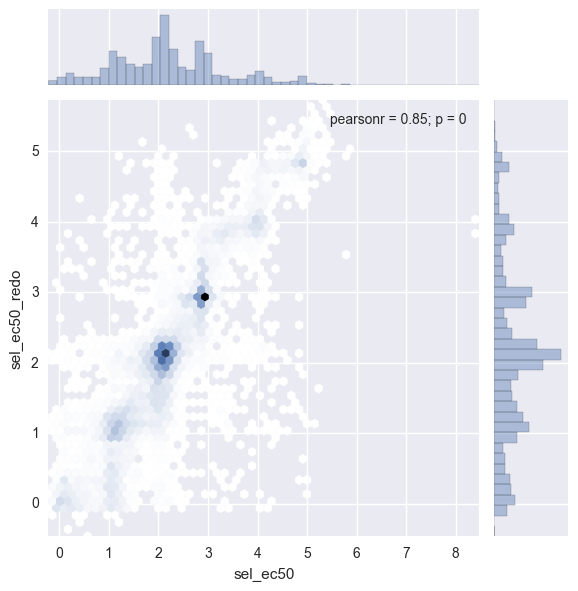

In [12]:
seaborn.jointplot(
    orig_vs_redo["sel_ec50"], orig_vs_redo["sel_ec50_redo"],
    kind="hex", joint_kws=dict(mincnt=1))

# Estimate sample ec50 credible intervals

,name,counts0,counts1,counts2,counts3,counts4,counts5,counts6
12479,EEHEE_rd3_0846.pdb_PG_hp,24,2,2,62,51,0,0
4193,HHH_rd3_0090.pdb_buryD,29,2,9,0,0,0,0
898,EEHEE_rd3_1008.pdb_buryD,31,3,26,134,0,0,0
1578,EEHEE_rd3_0300.pdb_PG_hp,33,2,29,0,0,0,0


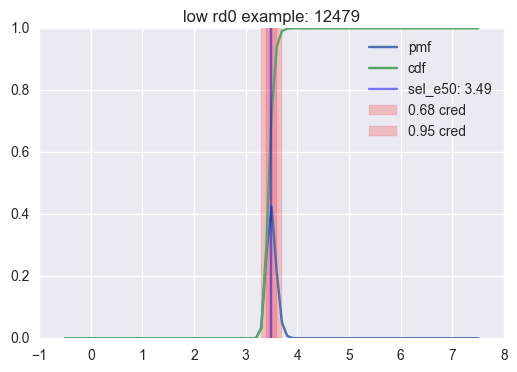

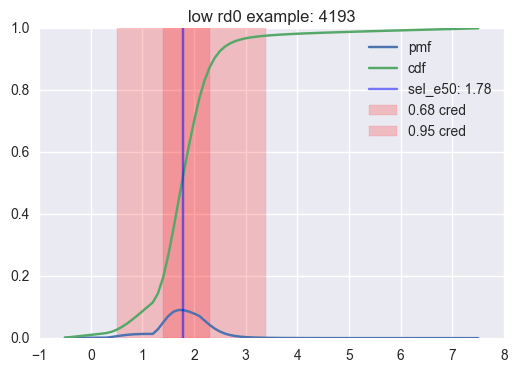

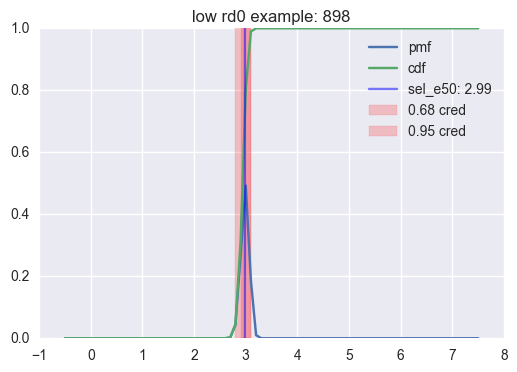

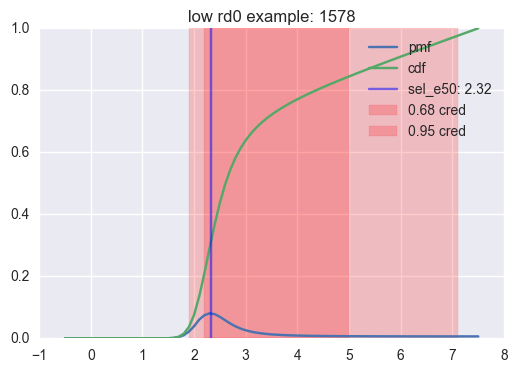

In [13]:
low_count_examples = (count_data.sort_values(by="counts0")
    .query("counts2 != 0 & counts1 != 0", engine="python").head(4))

for i in low_count_examples.index.values:
    pylab.figure()
    src_model.plot_cred_summary(src_model.estimate_ec50_cred(default_map, i))
    pylab.title("low rd0 example: %i" % i)
    pylab.legend()
    
low_count_examples

/Users/grocklin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


,name,counts0,counts1,counts2,counts3,counts4,counts5,counts6
6403,HEEH_rd3_0371.pdb_buryD,800,0,11,0,0,0,0
5591,HEEH_rd3_1100.pdb_PG_hp,242,36,0,1,0,0,0
6935,EEHEE_rd3_0078.pdb_PG_hp,151,13,46,0,0,0,0
4310,EEHEE_rd3_1695.pdb_buryD,529,77,347,11,0,0,0
3445,EEHEE_rd3_0351.pdb_buryD,246,11,117,237,0,0,0
6748,EEHEE_rd3_1627.pdb,336,36,205,144,84,1989,22391


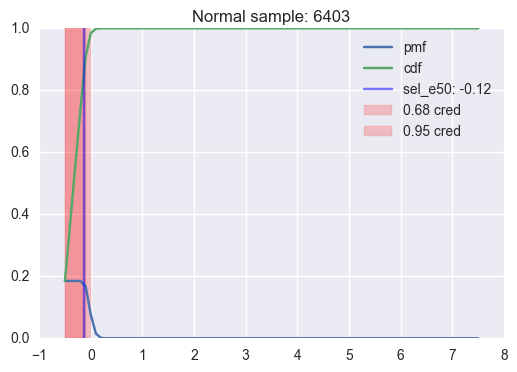

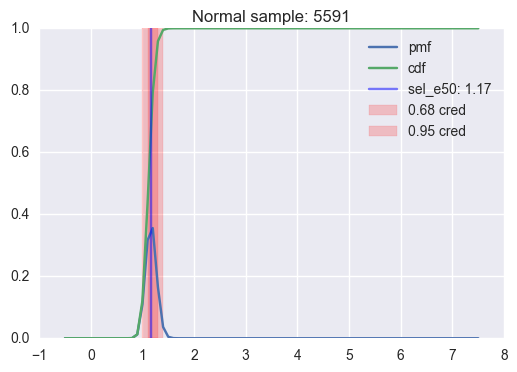

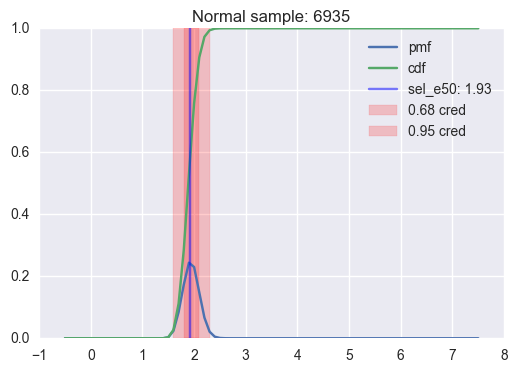

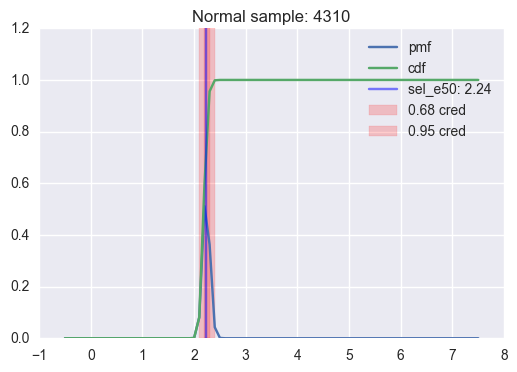

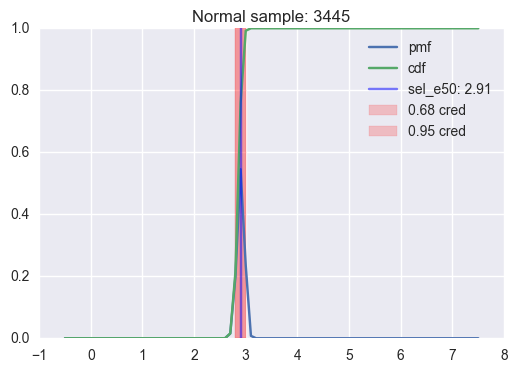

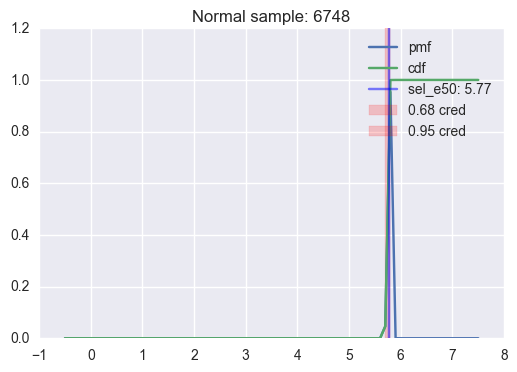

In [14]:
iorder = numpy.argsort(default_map["sel_ec50"])

isamples = iorder[::len(iorder)/5]


for i in isamples:
    pylab.figure()
    pylab.title("Normal sample: %s" % i)
    
    src_model.plot_cred_summary(src_model.estimate_ec50_cred(default_map, i))
    
    pylab.legend()
count_data.iloc[isamples]

counts0 > 200 & 0 < counts1 < counts0 * .2 & 0 < counts3 < 10 & 0 < counts4 < 10 & 0 < counts5


,name,counts0,counts1,counts2,counts3,counts4,counts5,counts6
4178,HEEH_rd3_0952.pdb_PG_hp,354,39,65,1,1,1,0
4813,EEHEE_rd3_1234.pdb_buryD,608,59,202,1,1,1,0
6266,EEHEE_rd3_0250.pdb_buryD,538,29,431,1,1,1,0
9736,EEHEE_rd3_0415.pdb_buryD,614,51,363,7,1,2,0
10581,EHEE_rd3_0101.pdb_buryD,917,78,695,1,2,1,0


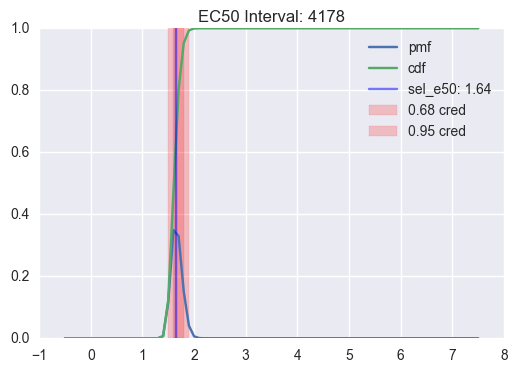

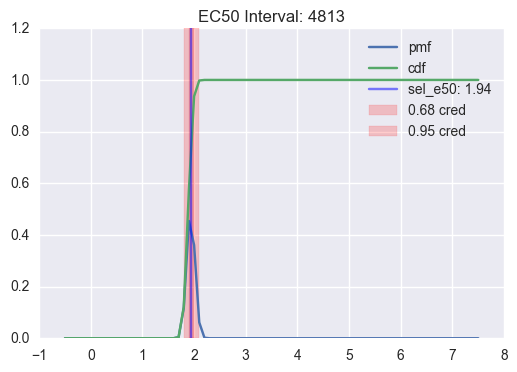

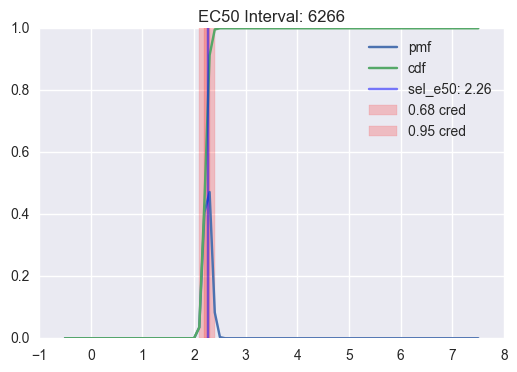

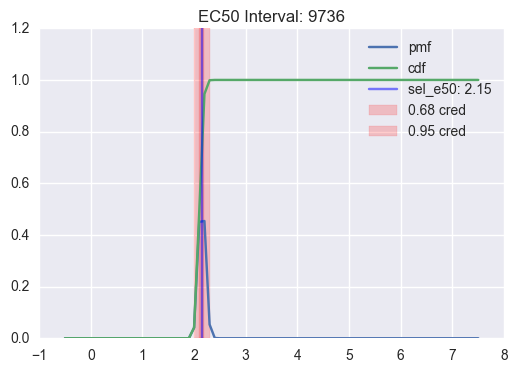

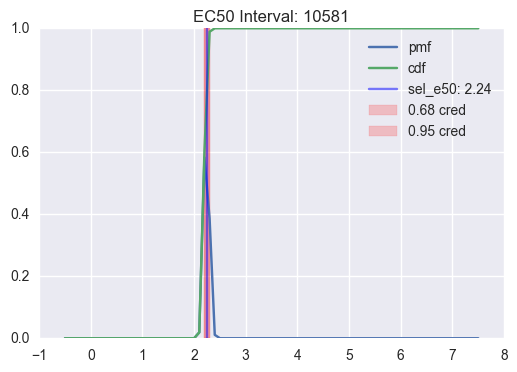

In [15]:
lc_outlier_query = "counts0 > 200 & 0 < counts1 < counts0 * .2 & 0 < counts3 < 10 & 0 < counts4 < 10 & 0 < counts5"
lc_outliers = count_data.query(lc_outlier_query, engine="python")

print(lc_outlier_query)
for i in lc_outliers.index.values:
    pylab.figure()
    pylab.title("EC50 Interval: %s" % i)
    src_model.plot_cred_summary(src_model.estimate_ec50_cred(default_map, i))
    
    pylab.legend()
    
lc_outliers

In [16]:
import ipywidgets

name       HEEH_rd3_1353.pdb_PG_hp
counts0                        275
counts1                         20
counts2                         62
counts3                        215
counts4                        117
counts5                        126
counts6                          0
Name: 0, dtype: object


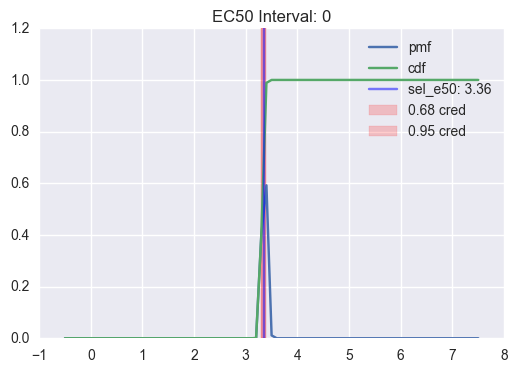

In [17]:
def plot_ec50_interval(i):
    pylab.figure()
    pylab.title("EC50 Interval: %s" % i)
    print(count_data.ix[i])
    src_model.plot_cred_summary(src_model.estimate_ec50_cred(default_map, i))
    
    pylab.legend()
    
ipywidgets.interact(plot_ec50_interval, i=ipywidgets.IntText())
pass

# Estimate posterior probability distributions

In [18]:
sel_sum = src_model.model_outlier_summary(default_map)

In [19]:
mean_errors = sorted([(k, numpy.nanmean(v["sel_log_likelihood"])) for k, v in sel_sum.items()])

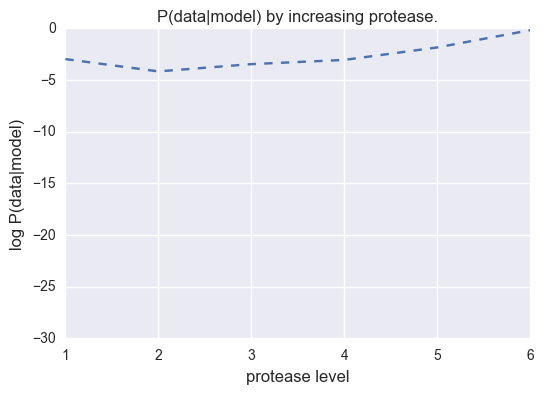

In [20]:
pylab.plot(zip(*mean_errors)[1], "--")
pylab.ylim(-30, 0)
pylab.xticks(range(len(mean_errors)), zip(*mean_errors)[0])
pylab.ylabel("log P(data|model)", fontsize="large")
pylab.xlabel("protease level", fontsize="large")
pylab.title("P(data|model) by increasing protease.", fontsize="large")

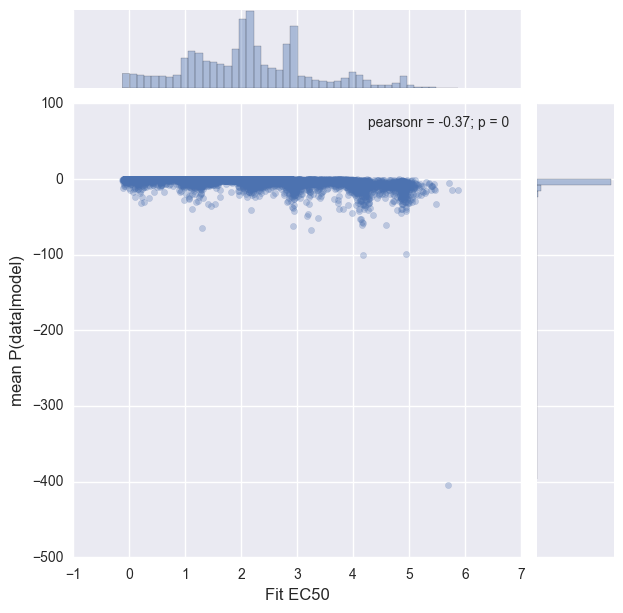

In [21]:
mean_llh = numpy.nanmean(
    numpy.stack([v["sel_log_likelihood"] for v in sel_sum.values()]),
    axis=0)
mean_llh[~numpy.isfinite(mean_llh)] = -250
jp = seaborn.jointplot( default_map["sel_ec50"], mean_llh, joint_kws={"alpha" : .3})
jp.ax_joint.set_xlabel("Fit EC50", fontsize="large")
jp.ax_joint.set_ylabel("mean P(data|model)", fontsize="large")

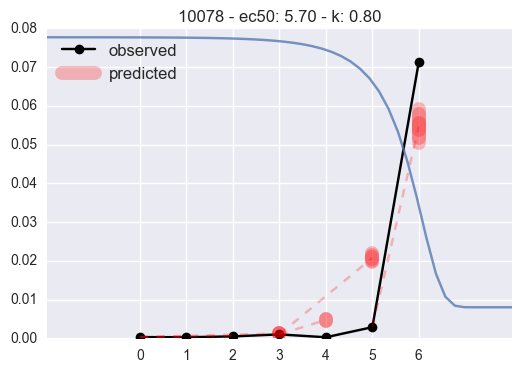

In [22]:
import scipy.stats

def plot_fit_summary(i, model, fit):
    sel_sum = model.model_selection_summary(fit)
    
    sel_levels = {
        k : p["selection_level"] if p["selection_level"] else 0
        for k, p in model.population_data.items()}
    
    sel_fracs = {
        k : p["P_sel"][i] / p["P_sel"].sum()
        for k, p in model.population_data.items()}
    
    pylab.xticks(
        sel_levels.values(), sel_levels.keys())
    pylab.xlim((-1, 7))
    
    porder = [
        k for k, p in
        sorted(model.population_data.items(), key=lambda (k, p): p["selection_level"])]
    
    pylab.plot(
        [sel_levels[k] for k in porder],
        [sel_fracs[k] for k in porder],
        "-o",
        color="black", label="observed")
    
    lbl = False
    for k in sel_sum:
        n = sel_sum[k]["P_sel"].sum()
        p = sel_sum[k]["P_cleave"][i]
        sel_level = model.population_data[k]["selection_level"]
        
        if p<=0:
            continue
        
        bn = scipy.stats.binom(n=n, p=p)
        
        parkey = model.population_data[k]["parent"]
        pylab.plot(
            [sel_levels[parkey], sel_levels[k]],
            [sel_fracs[parkey], float(bn.ppf(.5)) / n],
            "--", color="red", alpha=.25
        )
        
        
        
        
        for ci in (.68, .95, .99):
            pylab.plot(
                [sel_level] * 2, bn.ppf([ci, 1-ci]) / n,
                linewidth=10, color="red", alpha=.25,
                label="predicted" if not lbl else None
            )
            lbl=True
            
    pylab.legend(fontsize="large", loc="best")
    
    pylab.twinx()
    xs = numpy.linspace(-2, 8)
    sel_ec50 = fit["sel_ec50"][i]
    sel_k = 0.8 #fit["sel_k"][i] if len(fit["sel_k"]) > 1 else fit["sel_k"]
    pylab.plot(xs, (1.0-erf(  sel_k * (3.0 ** (xs - sel_ec50) - 1.0)   )/2.0), alpha=.75)
    pylab.yticks([], [])
    
    pylab.title("%s - ec50: %.2f - k: %.2f" % (i, sel_ec50, sel_k))
    
ordering = numpy.argsort(mean_llh)

@ipywidgets.interact(i_i=ipywidgets.IntSlider(max=len(ordering) - 1))
def plot_sum(i_i):
    plot_fit_summary(ordering[i_i], src_model, default_map)